In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tqdm import tqdm
import numpy as np
from PIL import Image

# Directory paths
open_eyes_dir = '/content/drive/MyDrive/train/Open_Eyes'
closed_eyes_dir = '/content/drive/MyDrive/train/Closed_Eyes'

X = []
Y = []

# Process images in the Open_Eyes directory
for i in tqdm(os.listdir(open_eyes_dir)):
    file_path = os.path.join(open_eyes_dir, i)
    if os.path.isfile(file_path):
        temp = np.array(Image.open(file_path).resize((64, 64)))
        X.append(temp)
        Y.append(1)

# Process images in the Closed_Eyes directory
for i in tqdm(os.listdir(closed_eyes_dir)):
    file_path = os.path.join(closed_eyes_dir, i)
    if os.path.isfile(file_path):
        temp = np.array(Image.open(file_path).resize((64, 64)))
        X.append(temp)
        Y.append(0)


100%|██████████| 2010/2010 [00:24<00:00, 83.24it/s] 


In [ ]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [ ]:
X = np.expand_dims(X,-1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
68/68 [==============================] - ETA: 0s - loss: 0.1243 - accuracy: 0.9573
Epoch 1: val_loss improved from inf to 0.84621, saving model to bestModel.h5
68/68 [==============================] - 77s 1s/step - loss: 0.1243 - accuracy: 0.9573 - val_loss: 0.8462 - val_accuracy: 0.5195
Epoch 2/30
68/68 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9828
Epoch 2: val_loss did not improve from 0.84621
68/68 [==============================] - 72s 1s/step - loss: 0.0471 - accuracy: 0.9828 - val_loss: 1.4845 - val_accuracy: 0.5195
Epoch 3/30
68/68 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9930
Epoch 3: val_loss did not improve from 0.84621
68/68 [==============================] - 72s 1s/step - loss: 0.0281 - accuracy: 0.9930 - val_loss: 1.5814 - val_accuracy: 0.5195
Epoch 4/30
68/68 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9842
Epoch 4: val_loss did not improve from 0.84621
68/68 [============

In [ ]:
model.evaluate(x_test, y_test)


42/42 [==============================] - 13s 324ms/step - loss: 0.0093 - accuracy: 0.9970


[0.009332574903964996, 0.996985673904419]

In [ ]:
from google.colab import drive
from keras.models import load_model

# Mount Google Drive
drive.mount('/content/drive')

# Update the model file path in Google Drive
model_path = '/content/bestModel.h5'

# Load the model
best_model = load_model(model_path)

# Prepare your test data x_test and y_test

# Evaluate the model
best_model.evaluate(x_test, y_test)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
42/42 [==============================] - 10s 237ms/step - loss: 0.0075 - accuracy: 0.9985


[0.007484949193894863, 0.9984928369522095]

1/1 [==============================] - 0s 173ms/step


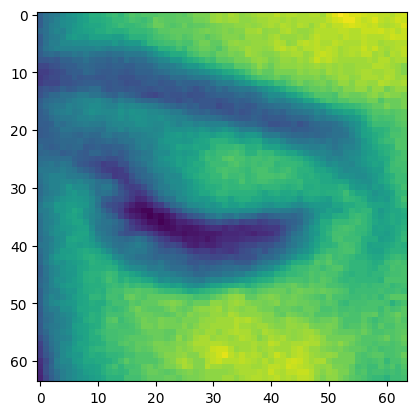

Closed
1/1 [==============================] - 0s 30ms/step


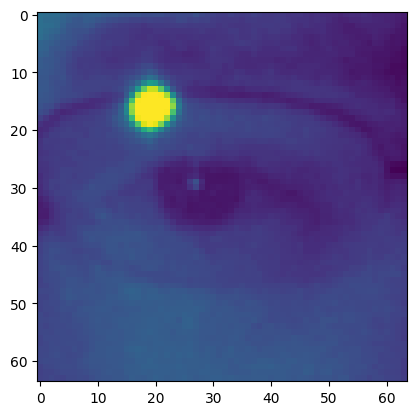

Open
1/1 [==============================] - 0s 28ms/step


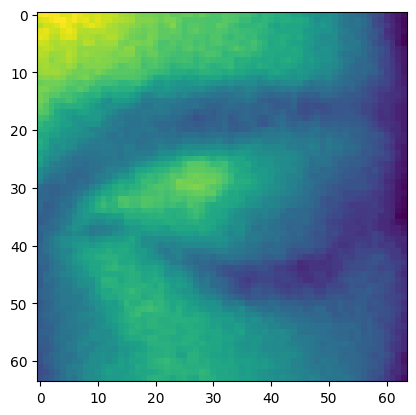

Closed
1/1 [==============================] - 0s 32ms/step


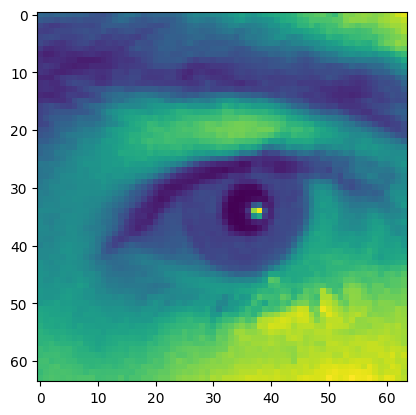

Open
1/1 [==============================] - 0s 32ms/step


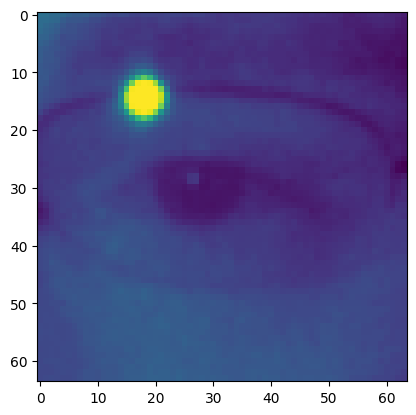

Open


In [ ]:
for i in x_test[0:5]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()

    if result > 0.5:
        print('Open')
    else:
        print("Closed")

42/42 [==============================] - 10s 240ms/step


Text(0.5, 25.722222222222214, 'Actual')

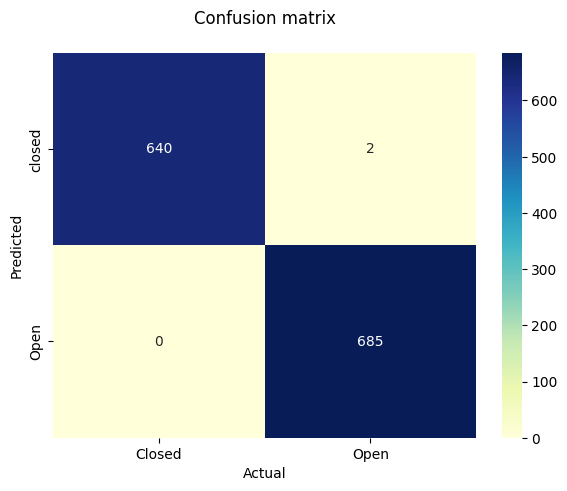

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open' ], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score

# Calculate F1 score
f1 = f1_score(y_test, preds)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)

# Calculate precision
precision = precision_score(y_test, preds)

print("F1 score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))


F1 score: 1.00
Accuracy: 1.00
Precision: 1.00
